# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

In [2]:
path = "../../data/"
fname = "Online_Retail.csv"
df = pd.read_csv(path + fname
               , encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.00,France


### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [3]:
online_rt = df.copy()
online_rt.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.00,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

''

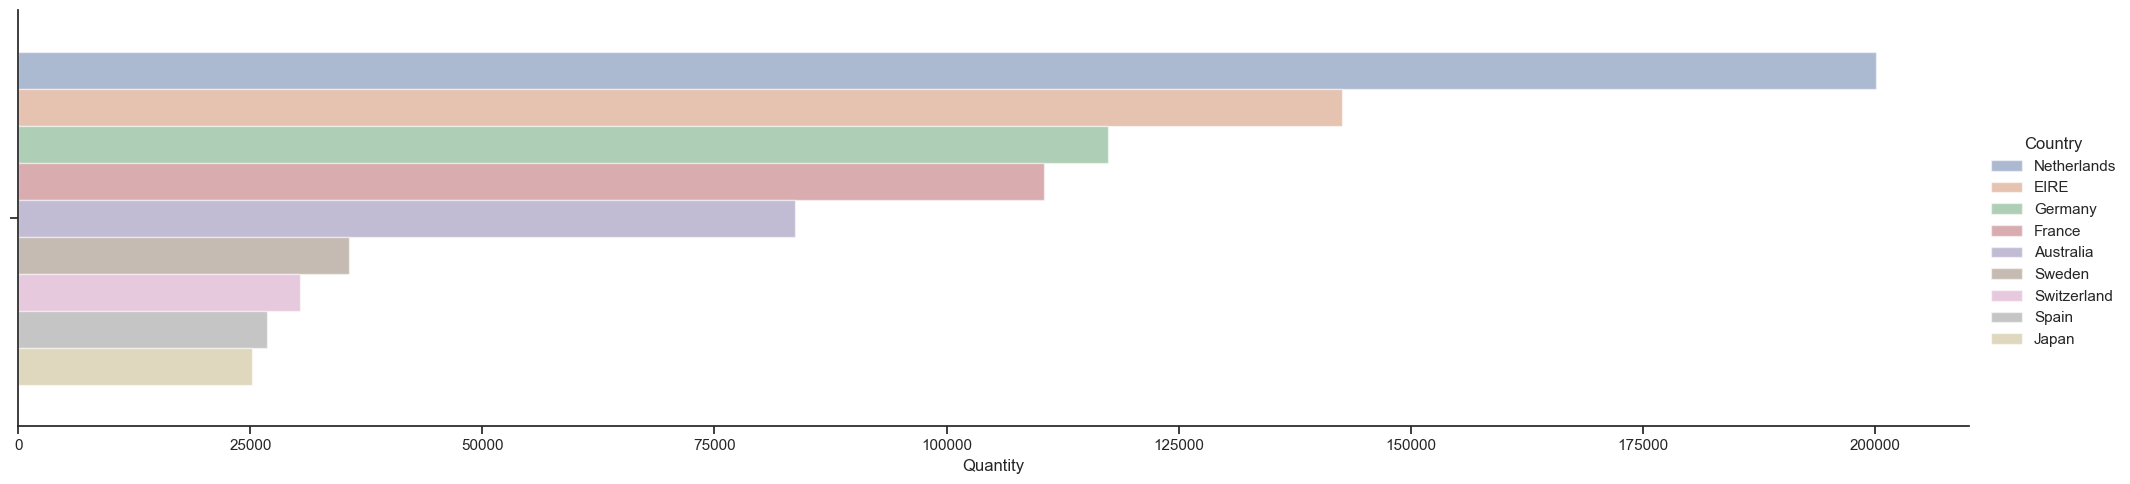

In [4]:
tmp = online_rt.groupby(by=['Country'])[['Quantity']].sum()
tmp = tmp.sort_values(by = 'Quantity',ascending = False)

g = sns.catplot(
    data=tmp.iloc[1:10,:], # without United Kingdon. Quantity: 4,263,829

    x="Quantity",    
    hue="Country",

    legend=True, 
    aspect=4,
    kind="bar",  # kde
    alpha=0.5,
)
;

### Step 5.  Exclude negative Quantity entries

In [5]:
display(online_rt.shape)

online_rt = online_rt[online_rt['Quantity']>0]
display(online_rt.shape)

(541909, 8)

(531285, 8)

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [6]:
country_groups = online_rt.groupby(by='Country')
qty = country_groups[['Quantity']].sum()

top3 = qty.sort_values(by = 'Quantity', ascending=False).iloc[1:4,:].index
online_rt[online_rt.Country.isin(top3)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.00,Netherlands
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.00,Netherlands
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.00,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.00,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.00,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/11 12:16,1.25,12713.00,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/11 12:16,0.85,12713.00,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/11 12:16,0.85,12713.00,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/11 12:16,2.08,12713.00,Germany


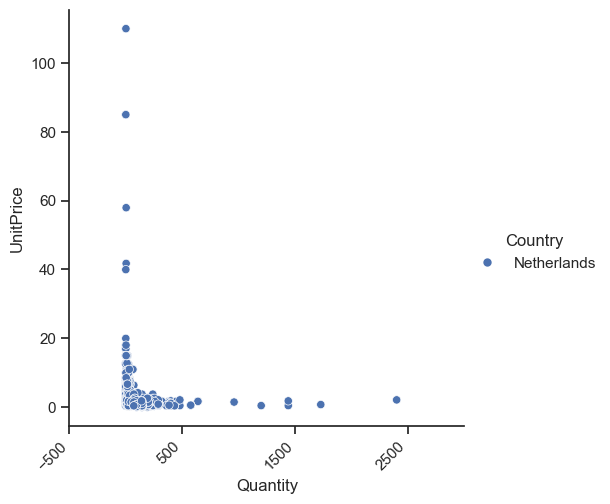

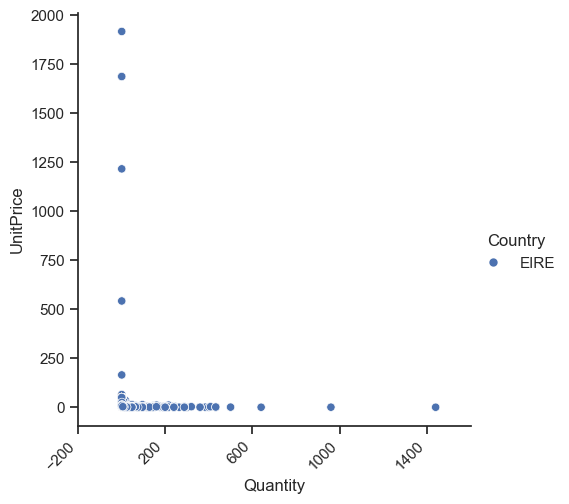

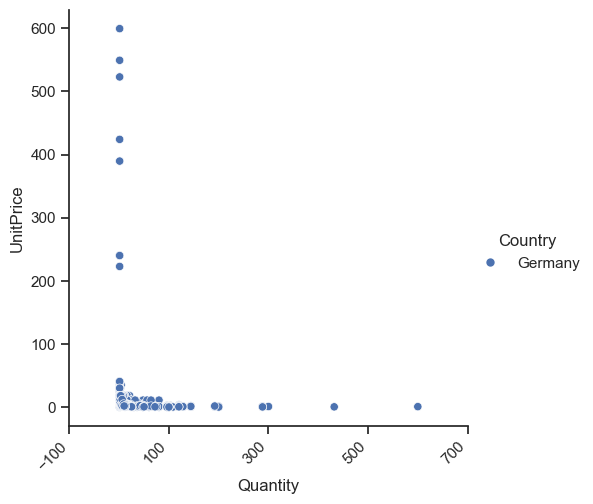

In [7]:
for i in top3:
    g = sns.relplot(
        # data=online_rt[online_rt.Country.isin(top3) & online_rt['Country']=='Germany'],
        data=online_rt[online_rt['Country']==i],
        x="Quantity",
        y="UnitPrice",
        hue="Country",
        kind="scatter", # "line",  # OR scatter
        aspect=1,
    )

    g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [8]:
customers = online_rt.groupby(['CustomerID','Country'])[['Quantity', 'UnitPrice']].sum().head()

customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.00,United Kingdom,74215,1.04
12347.00,Iceland,2458,481.21
12348.00,Finland,2341,178.71
12349.00,Italy,631,605.10
12350.00,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [9]:
customers.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [10]:
online_rt.CustomerID = online_rt.CustomerID.fillna(-99).astype('int64')
online_rt
filt_1 = (online_rt.CustomerID == 12346)
filt_2 = (online_rt.CustomerID == 12347)
online_rt[filt_1 | filt_2].sort_values(by=['CustomerID', 'UnitPrice']
                                       , ascending=[True, False])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346,United Kingdom
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347,Iceland
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347,Iceland
...,...,...,...,...,...,...,...,...
428979,573511,23506,MINI PLAYING CARDS SPACEBOY,20,10/31/11 12:25,0.42,12347,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347,Iceland
535014,581180,23508,MINI PLAYING CARDS DOLLY GIRL,20,12/7/11 15:52,0.42,12347,Iceland
220583,556201,17021,NAMASTE SWAGAT INCENSE,36,6/9/11 13:01,0.30,12347,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [11]:
online_rt['SalesVolume'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.groupby('Country')[['SalesVolume']].sum().sort_values(by='SalesVolume').tail(4).head(3).index

Index(['Germany', 'EIRE', 'Netherlands'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [12]:
online_rt['SalesVolume'] = online_rt.Quantity * online_rt.UnitPrice
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesVolume
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680,France,16.60


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [13]:
grp = online_rt.groupby(by=['CustomerID','Country'])
varplt = grp[['Quantity', 'SalesVolume']].agg('sum')
varplt['AvgPrice'] = varplt['SalesVolume'] / varplt['Quantity']
display(varplt)

varplt['Country'] = varplt.index.get_level_values(1)
varplt.tail(10)

Quantity  SalesVolume  AvgPrice
CustomerID Country                                        
-99        Bahrain               54       205.74      3.81
           EIRE                6922     17908.06      2.59
           France               632       691.06      1.09
           Hong Kong           4773     15691.80      3.29
           Israel               363       913.57      2.52
...                             ...          ...       ...
 18280     United Kingdom        45       180.60      4.01
 18281     United Kingdom        54        80.82      1.50
 18282     United Kingdom       103       178.05      1.73
 18283     United Kingdom      1397      2094.88      1.50
 18287     United Kingdom      1586      1837.28      1.16

[4356 rows x 3 columns]

,,Quantity,SalesVolume,AvgPrice,Country
CustomerID,Country,,,,
18273,United Kingdom,80,204.00,2.55,United Kingdom
18274,United Kingdom,88,175.92,2.00,United Kingdom
18276,United Kingdom,186,335.86,1.81,United Kingdom
18277,United Kingdom,68,110.38,1.62,United Kingdom
18278,United Kingdom,66,173.90,2.63,United Kingdom
18280,United Kingdom,45,180.60,4.01,United Kingdom
18281,United Kingdom,54,80.82,1.50,United Kingdom
18282,United Kingdom,103,178.05,1.73,United Kingdom
18283,United Kingdom,1397,2094.88,1.50,United Kingdom


##### Step 7.3.3 Plot

In [14]:
varplt[varplt.Country.isin(top3)]

,,Quantity,SalesVolume,AvgPrice,Country
CustomerID,Country,,,,
-99,EIRE,6922,17908.06,2.59,EIRE
12426,Germany,258,582.73,2.26,Germany
12427,Germany,533,825.80,1.55,Germany
12468,Germany,366,729.54,1.99,Germany
12471,Germany,8212,19824.05,2.41,Germany
...,...,...,...,...,...
14016,EIRE,2125,4341.21,2.04,EIRE
14156,EIRE,57885,117379.63,2.03,EIRE
14335,Germany,379,468.26,1.24,Germany


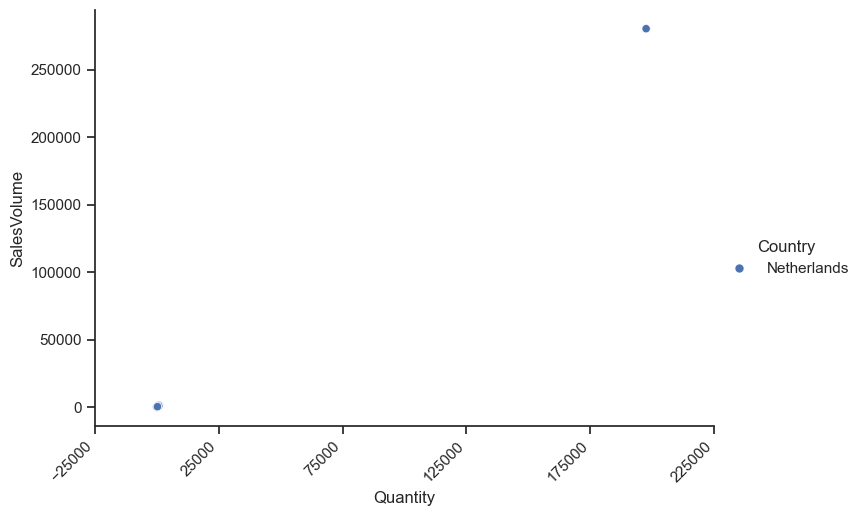

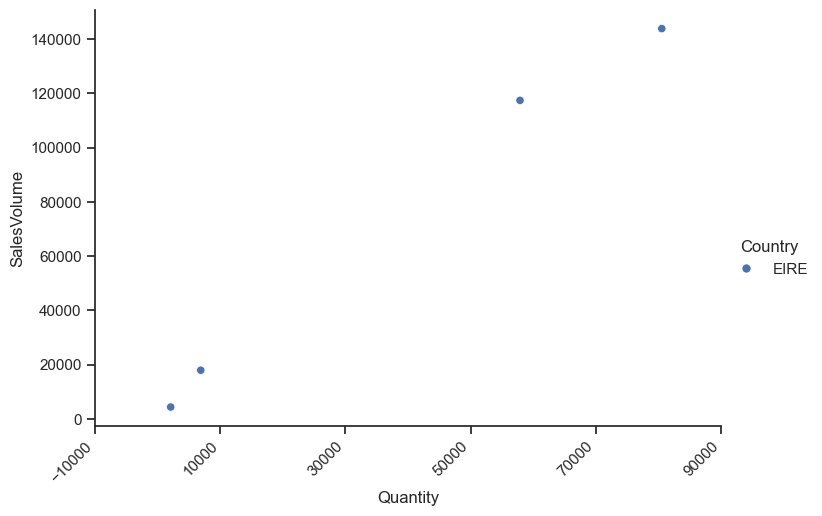

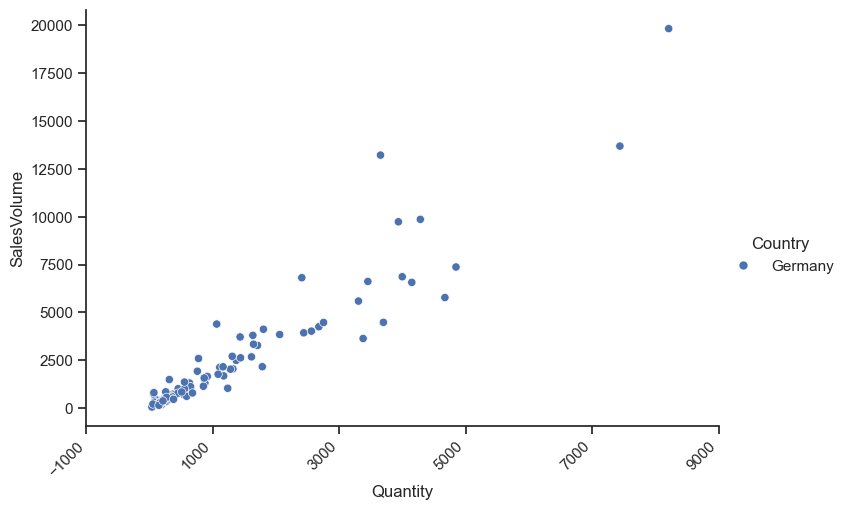

In [15]:
for i in top3:
    g = sns.relplot(
        # data=varplt[varplt.Country.isin(top3)]
        data=varplt[varplt.Country.isin([i])]
        , x='Quantity'
        , y='SalesVolume'
        , hue='Country'
        # , style='Country'
        , kind="scatter" # "line",  # OR scatter
        , aspect=1.5
    )
    g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

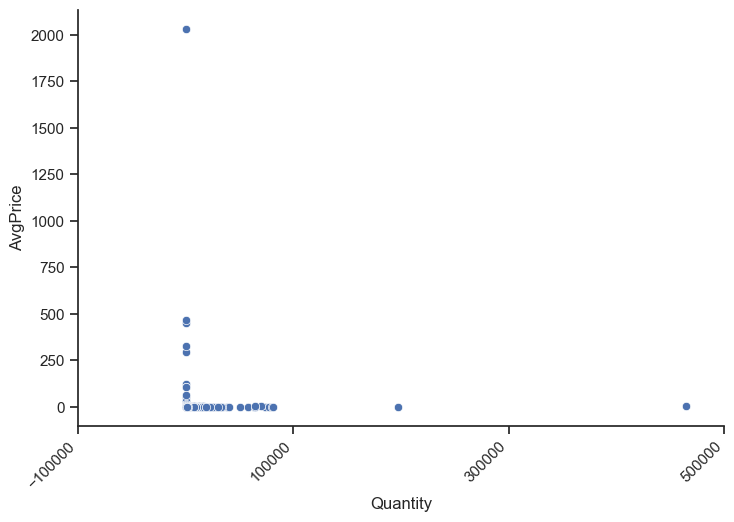

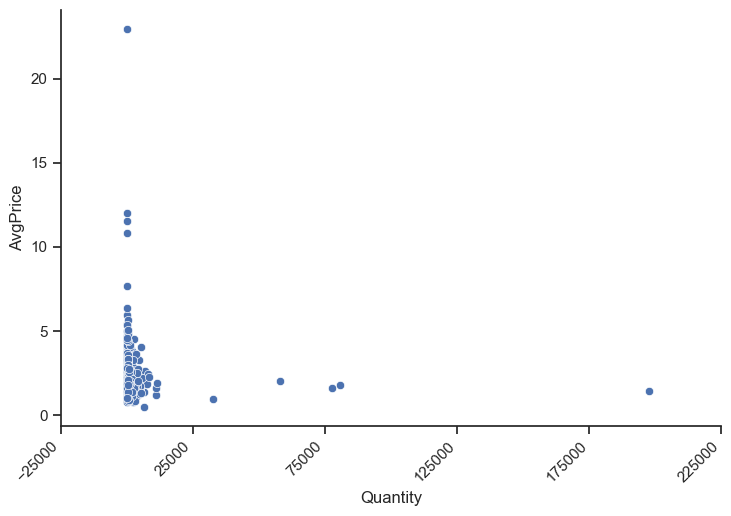

In [16]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped[['Quantity','SalesVolume']].agg('sum')
plottable['AvgPrice'] = plottable.SalesVolume / plottable.Quantity

g = sns.relplot(
    # data=varplt[varplt.Country.isin(top3)]
    data=varplt
    , x='Quantity'
    , y='AvgPrice'
    # , hue='Country'
    # , style='Country'
    , kind="scatter" # "line",  # OR scatter
    , aspect=1.5
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

g = sns.relplot(
    # data=varplt[varplt.Country.isin(top3)]
    data=varplt[~varplt.Country.isin(['United Kingdom'])]
    , x='Quantity'
    , y='AvgPrice'
    # , hue='Country'
    # , style='Country'
    , kind="scatter" # "line",  # OR scatter
    , aspect=1.5
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

##### Step 7.4.2 Zoom in so we can see that curve more clearly

''

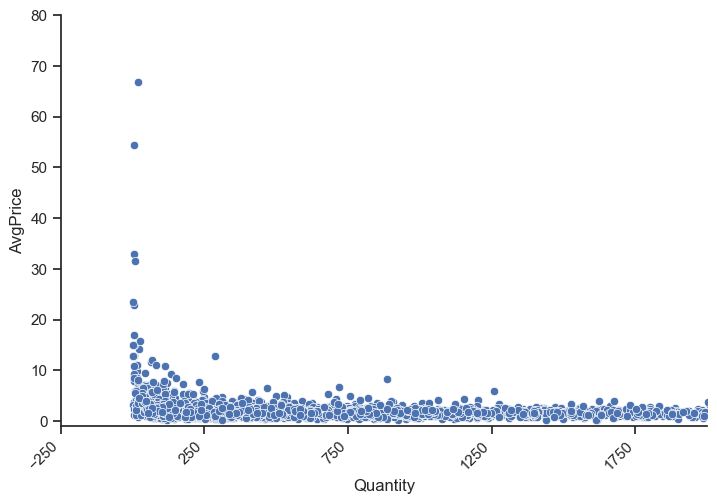

In [17]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped[['Quantity','SalesVolume']].agg('sum')
plottable['AvgPrice'] = plottable.SalesVolume / plottable.Quantity

g = sns.relplot(
    # data=varplt[varplt.Country.isin(top3)]
    data=varplt
    , x='Quantity'
    , y='AvgPrice'
    # , hue='Country'
    # , style='Country'
    , kind="scatter" # "line",  # OR scatter
    , aspect=1.5
    , facet_kws={'xlim': (-40,2000), 'ylim': (-1, 80)}
)
g.set_xticklabels(rotation=45, horizontalalignment="right", step=2)
;

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [18]:
price_start = 0 
price_end = 50
price_interval = 1

buckets = np.arange(price_start
                  , price_end
                  , price_interval)
buckets
UnitPrice_grouped = pd.cut(online_rt['UnitPrice'], buckets)
rev_per_price = pd.DataFrame(online_rt.groupby(UnitPrice_grouped)['SalesVolume'].sum())
rev_per_price['bin'] = rev_per_price.index
rev_per_price.reset_index()

/var/folders/fb/453r9d2j24g8x8tc93n2k6600000gn/T/ipykernel_27426/1761541060.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rev_per_price = pd.DataFrame(online_rt.groupby(UnitPrice_grouped)['SalesVolume'].sum())


,UnitPrice,SalesVolume,bin
0,"(0, 1]",1107774.54,"(0, 1]"
1,"(1, 2]",2691765.11,"(1, 2]"
2,"(2, 3]",2024143.09,"(2, 3]"
3,"(3, 4]",865101.78,"(3, 4]"
4,"(4, 5]",1219377.05,"(4, 5]"
5,"(5, 6]",391001.44,"(5, 6]"
6,"(6, 7]",268922.63,"(6, 7]"
7,"(7, 8]",306205.23,"(7, 8]"
8,"(8, 9]",380043.78,"(8, 9]"
9,"(9, 10]",163837.73,"(9, 10]"


#### 8.3 Plot.

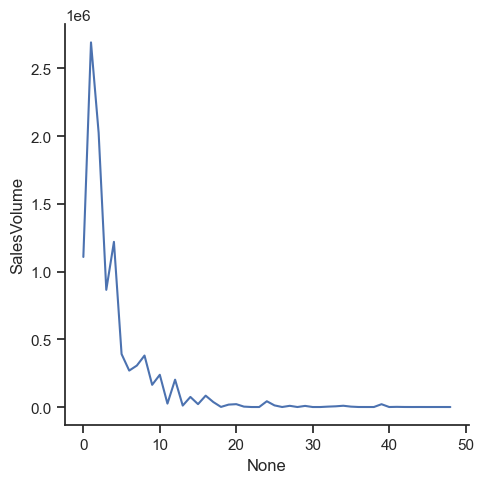

In [19]:
# sns.relplot(data=rev_per_price, x= 'bin', y= 'SalesVolume', kind='line')
g = sns.relplot(
    data=rev_per_price.reset_index(), 
    x=rev_per_price.reset_index().index,
    y='SalesVolume',
    kind='line')

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

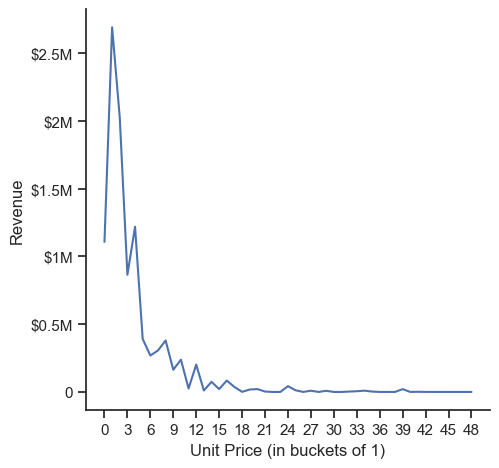

In [20]:
# sns.relplot(data=rev_per_price, x= 'bin', y= 'SalesVolume', kind='line')
g = sns.relplot(
    data=rev_per_price.reset_index(), 
    x=rev_per_price.reset_index().index,
    y='SalesVolume',
    kind='line')

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show();

### BONUS: Create your own question and answer it.